Main scope : A classification model for glass type

(0) import all the package needed here

In [105]:
import os
import sys
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, chi2_contingency, spearmanr
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib
import imblearn
import sklearn

import yaml
import re
import hashlib
print("all packages needed have been imported")

all packages needed have been imported


(0.1) get the version of packages imported

In [110]:
#get the version of important packages used
package_info = {
    'pandas': pd.__version__,
    'numpy': np.__version__,
    'matplotlib': matplotlib.__version__,
    'seaborn': sns.__version__,
    'imblearn': imblearn.__version__,
    'sklearn': sklearn.__version__,
}

# download to yml file
output_file = 'package_versions.yml'

with open(output_file, 'w') as file:
    yaml.dump(package_info, file, default_flow_style=False)
print("packages version downloaded")

packages version downloaded


(1.1) load files of dataset sheet1 and sheet2 after data version control

In [13]:
# control data version by checking MD5

def calculate_md5(file_path):
    with open(file_path, 'rb') as file:
        md5_hash = hashlib.md5()
        while chunk := file.read(8192):
            md5_hash.update(chunk)
        return md5_hash.hexdigest()

def verify_md5(file_path, expected_md5):
    calculated_md5 = calculate_md5(file_path)
    return calculated_md5 == expected_md5

expected_md5 = "f63497ca7c56a7f6d93bcd4a14a936d9"

# find file path
directory_path = sys.path[0]
data_path = directory_path + "\data.xlsx"

if verify_md5(data_path, expected_md5):
    print("File's MD5 checksum verified successfully. Proceed with file access.")

    # Read sheet1 of the file: The relationship between weathering and its features
    data_sheet1 = pd.read_excel(data_path, sheet_name="Sheet1")

    # Display data sheet1
    title = "Display of data sheet1"
    display(Markdown(f"## {title}"))
    display(data_sheet1)

    # Read file sheet2: The chemical composition data for glass samples
    data_sheet2 = pd.read_excel(data_path, sheet_name="Sheet2")

    # Display data sheet2
    title = "Display of data sheet2"
    display(Markdown(f"## {title}"))
    display(data_sheet2)
else:
    print("File's MD5 checksum verification failed. Please check the latest data file in GitHub")


File's MD5 checksum verified successfully. Proceed with file access.


## Display of data sheet1

,Sample number,Decoration,Glass type,Color,Surface weathering
0,1,C,Potassium,Cyan,Unweathered
1,2,A,Lead Barium,Light Blue,Weathered
2,3,A,Potassium,Cyan,Unweathered
3,4,A,Potassium,Cyan,Unweathered
4,5,A,Potassium,Cyan,Unweathered
5,6,A,Potassium,Cyan,Unweathered
6,7,B,Potassium,Cyan,Weathered
7,8,C,Lead Barium,Purple,Weathered
8,9,B,Potassium,Cyan,Weathered
9,10,B,Potassium,Cyan,Weathered


## Display of data sheet2

,Sampling point,Silicon dioxide (SiO2),Sodium oxide (Na2O),Potassium oxide (K2O),Calcium oxide (CaO),Magnesium oxide (MgO),Aluminum oxide (Al2O3),Iron oxide (Fe2O3),Copper oxide (CuO),Lead oxide (PbO),Barium oxide (BaO),Phosphorus pentoxide (P2O5),Strontium oxide (SrO),Tin oxide (SnO2),Sulfur dioxide (SO2)
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,03 Part 1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,03 Part 2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54 Heavily weathered point,17.11,NaN,NaN,NaN,1.11,3.65,NaN,1.34,58.46,NaN,14.13,1.12,NaN,NaN
65,55,49.01,2.71,NaN,1.13,NaN,1.45,NaN,0.86,32.92,7.95,0.35,NaN,NaN,NaN
66,56,29.15,NaN,NaN,1.21,NaN,1.85,NaN,0.79,41.25,15.45,2.54,NaN,NaN,NaN
67,57,25.42,NaN,NaN,1.31,NaN,2.18,NaN,1.16,45.10,17.30,NaN,NaN,NaN,NaN


(1.2) generate yml file of the metadata sheet1 and sheet2

In [14]:
metadata_sheet1 = {
    'Description': {
        'Sample number': "A unique identifier for each artifact.",
        'Decoration': "The pattern type of the cultural relic, which is 'A' or 'B' or 'C'.",
        'Glass type': "The type of cultural relic, which is 'high potassium' or 'lead barium'.",
        'Color': "The color of the artifact, such as 'Cyan' or 'light blue'.",
        'Surface weathering': "Whether the cultural relic has been weathered, it is 'no weathering' or 'weathering'."
    },
    'Publisher': "Higher Education Press, PRC",
    'Title': "The Relationship Between Weathering and Its Features",
    'Date': "15.09.2022",
    'Language': "English",
    'Format': ".xlsx",
    'Rights': "CC0",
    'MD5' : "f63497ca7c56a7f6d93bcd4a14a936d9"
}

# Output data as a YML file
with open('metadata_sheet1.yml', 'w') as file:
    yaml.dump(metadata_sheet1, file)

metadata_sheet2 = {
    'Description': [
        {
            'Sampling point': "The selected point to detect the percentage content in each sample",
            'SiO2': "The percentage content of SiO2 in the selected sample point",
            'Na2O': "The percentage content of Na2O in the selected sample point",
            # other compounds here with their descriptions
            # For example:
            # 'OtherCompound': "The percentage content of OtherCompound in the selected sample point"
        }
    ],
    'Publisher': "Higher Education Press, PRC",
    'Title': "The chemical composition data for glass samples",
    'Date': "15.09.2022",
    'Language': "English",
    'Format': ".xlsx",
    'Rights': "CC0",
    'MD5' : "f63497ca7c56a7f6d93bcd4a14a936d9"
}

# Output data as a YML file
with open('metadata_sheet2.yml', 'w') as file:
    yaml.dump(metadata_sheet2, file)
    
print("metadata yml has been generated")

metadata yml has been generated


(2) find the relation between surface weathering and other features.

(2.1) preprocessing data sheet1 by filling missing values and label encoding

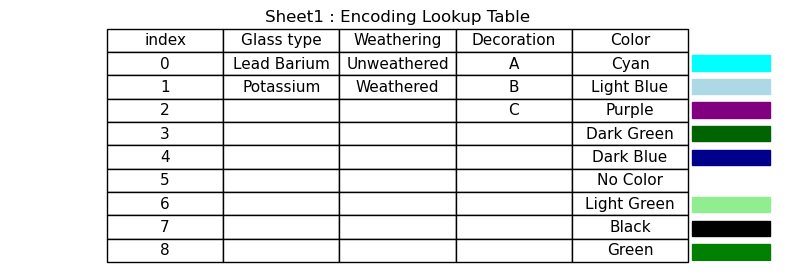

In [15]:
# preprocessing data sheet1
# fill missing values
data_sheet1.replace("-", np.nan, inplace=True)
data_sheet1.fillna("No Color", inplace=True)

# Label Encoding
data_sheet1["Decoration Labeled"] = data_sheet1["Decoration"].map({"A": 0, "B": 1, "C": 2})
data_sheet1["Glasstype Labeled"] = data_sheet1["Glass type"].map({"Potassium": 1, "Lead Barium": 0})
data_sheet1["Weathering Labeled"] = data_sheet1["Surface weathering"].map({"Weathered": 1, "Unweathered": 0})

unique_colors = data_sheet1["Color"].unique()
unique_colors_series = pd.Series(unique_colors, name="Color")
encoding_map = {color: index for index, color in enumerate(unique_colors)}
data_sheet1["Color Labeled"] = data_sheet1["Color"].replace(encoding_map)

# encoding visible
table_temp = {
    "Glass type": ["Lead Barium", "Potassium", ""],
    "Weathering": ["Unweathered", "Weathered", ""],
    "Decoration": ["A", "B", "C"],
}

df_table_encoding = pd.DataFrame(table_temp)
df_table_encoding = pd.concat([df_table_encoding, unique_colors_series], axis=1)
df_table_encoding.replace(np.nan, "", inplace=True)
df_table_encoding = df_table_encoding.reset_index(drop=True)
df_table_encoding = df_table_encoding.reset_index()

fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')
table_encoding = ax.table(cellText=df_table_encoding.values, colLabels=df_table_encoding.columns, cellLoc='center', loc='center', colWidths=[0.15] * len(df_table_encoding.columns))
table_encoding.auto_set_font_size(False)
table_encoding.set_fontsize(11)
table_encoding.scale(1, 1.4)

colors = ['Cyan', 'Light Blue', 'Purple', 'Dark Green', 'Dark Blue', 'No Color', 'Light Green', 'Black', 'Green']
rgb_values = [(0, 128, 0), (0, 0, 0), (144, 238, 144), None, (0, 0, 139), (0, 100, 0), (128, 0, 128), (173, 216, 230), (0, 255, 255)]
for i, color in enumerate(colors):
    if rgb_values[i] is not None:
        rect = plt.Rectangle((3.52, i*0.92+0.05), 0.4, 0.6, color=[x / 255 for x in rgb_values[i]])
        ax.add_patch(rect)

ax.set_xlim(0, 4)
ax.set_ylim(0, len(colors))
ax.set_title("Sheet1 : Encoding Lookup Table")

plt.axis('off')
plt.show()


(2.2) perform correlation analysis

In [16]:
table_data = {
    "comparing item": [],
    "test-method": [],
    "p": [],
    "relation": []
}
def correlation_analysis1(df,para1,para2,table_data) : 
    # contingency table
    str1 = para1 + " -- " + para2
    table_data["comparing item"].append(str1)
    contingency = pd.crosstab(df[para1], df[para2])
    # condition to carry Chi-Squared Test
    expected_frequencies = chi2_contingency(contingency)[3]
    proportion_less_than_5 = (expected_frequencies < 5).mean()

    if proportion_less_than_5 > 0.2:
        # carry Spearman Rank Correlation
        spearman_corr, p = spearmanr(df[para1], df[para2])
        table_data["test-method"].append("Spearman Rank Correlation")
    else:
        # carry Chi-Squared Test
        stat, p, dof, expected = chi2_contingency(contingency)
        table_data["test-method"].append("Chi-Squared Test")
    table_data["p"].append(p)
    if p < 0.05:
        table_data["relation"].append("Yes")
    else:
        table_data["relation"].append("No")
    return table_data
        
table_data = correlation_analysis1(data_sheet1,"Decoration","Surface weathering",table_data)
table_data = correlation_analysis1(data_sheet1,"Glass type","Surface weathering",table_data)
table_data = correlation_analysis1(data_sheet1,"Color","Surface weathering",table_data)
print("Relation between surface weathering and other features")
display(pd.DataFrame(table_data))

Relation between surface weathering and other features


,comparing item,test-method,p,relation
0,Decoration -- Surface weathering,Spearman Rank Correlation,0.781234,No
1,Glass type -- Surface weathering,Chi-Squared Test,0.019548,Yes
2,Color -- Surface weathering,Spearman Rank Correlation,0.948733,No


(3) develop a classification model for glasses

(3.1) data cleaning by filling missing data, delete outliers and meet the fixed sum = 1.

In [17]:
# preprocessing sheet2
# fill missing values
data_sheet2.fillna(0, inplace=True)

# the sum of all compounds should be among 85% and 105%, after cleaning should be 100%
data_sheet2_copy = data_sheet2.copy()

data_sheet2['portion_sum'] = data_sheet2.iloc[:, 1:15].sum(axis=1)

# Remove outliers
data_sheet2_removed = data_sheet2[(data_sheet2['portion_sum'] > 105) | (data_sheet2['portion_sum'] < 85)]
print("the index of removed Outliers:")
print(data_sheet2_removed.iloc[:, 0].values)
data_sheet2_cleaned = data_sheet2[(data_sheet2['portion_sum'] >= 85) | (data_sheet2['portion_sum'] <= 105)]

# Join the sheet2 data with main things of sheet1 data
data_sheet2_cleaned['Sample number'] = data_sheet2_cleaned['Sampling point'].str[:2].astype(int)
data_sheet2_cleaned = pd.merge(data_sheet2_cleaned, data_sheet1[['Sample number', 'Glass type']], on='Sample number')

# the sum of all compounds should be 100%
for index, row in data_sheet2_cleaned.iterrows():
    portion_sum = row['portion_sum']  # Get the portion_sum for each row
    for col in range(1, 15):
        value = row[col] / portion_sum * 100
        data_sheet2_cleaned.iloc[index, col] = round(value, 3)

the index of removed Outliers:
['15' '17']


(3.2) Descriptive statistics for sheet2 data

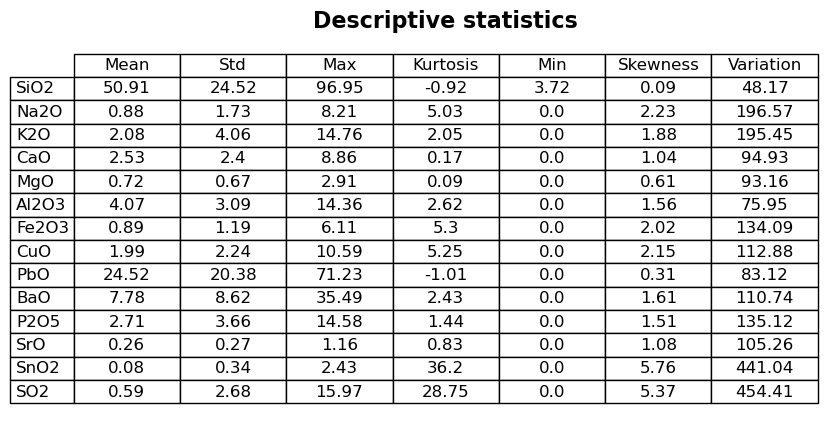

In [18]:
# Descriptive statistics for sheet2 data

compounds_only = data_sheet2_cleaned.iloc[:,1:15]

# Calculate statistics for each column
statistics_dict = {
    'Mean': compounds_only.mean().round(2),
    'Std': compounds_only.std().round(2),
    'Max': compounds_only.max().round(2),
    'Kurtosis': compounds_only.kurtosis().round(2),
    'Min': compounds_only.min().round(2),
    'Skewness': compounds_only.skew().round(2),
    'Variation': (100 * compounds_only.std() / compounds_only.mean()).round(2)
}

statistics_df = pd.DataFrame(statistics_dict)

# extract the Chemical Name from the long name
chemical_name = [s[s.find("(")+1:s.find(")")] for s in statistics_df.index]
chemical_name_series = pd.Series(chemical_name)
compounds_only.columns = chemical_name_series

# plot a table from the statistics dictionary
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('off')
table = ax.table(cellText=statistics_df.values,
                 colLabels=statistics_df.columns,
                 rowLabels=chemical_name_series,
                 cellLoc='center',
                 loc='center',
                 fontsize=14)  # Increase font size

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(12)  # Set font size for table cells
table.scale(1.2, 1.4)  # Reduce table height and width
ax.set_title('Descriptive statistics', fontweight='bold', fontsize=16)
plt.show()

(3.3) perform Centered Log-Ratio on ingredient data

In [44]:
# perform CLR and ALR method on data sheet2
# use a small number to replace 0 so that log can be carried
X = data_sheet2_cleaned.iloc[:, 1:15] / 100
X_copy = X.copy()
X.replace(0, 1e-6, inplace=True)
y = data_sheet2_cleaned.iloc[:, 17]

log_data = np.log(X)
mean_log = log_data.mean()
clr_data = log_data - mean_log

X_clr = clr_data

over_sampler = RandomOverSampler(random_state=42)
X_append, y_append = over_sampler.fit_resample(X, y)
X_clr_append, y_clr_append = over_sampler.fit_resample(X_clr, y)

print("clr performed finished")

clr performed finished


(3.4.1) classification model function

In [45]:
# classification model function
def classification_modeling_kfold(model, X, y):
    # Create KFold object and specify the K value
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Create empty lists to store accuracy and confusion matrices for each cross-validation
    accuracy_scores = []
    confusion_matrices = []
    type_glass = ["Lead Barium", "Potassium"]

    # Perform K-fold cross-validation
    for train_indices, test_indices in kfold.split(X_clr_append):
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        # Model training
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy and store it
        accuracy = accuracy_score(y_test, y_pred) * 100
        accuracy_scores.append(accuracy)

        # Calculate confusion matrix and store it
        confusion_matrix_result = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(confusion_matrix_result)

        # Create a DataFrame to represent the confusion matrix with labeled rows and columns
        class_accuracy = pd.DataFrame(confusion_matrix_result, index=type_glass, columns=type_glass)

        # Print the confusion matrix for each cross-validation
        print(f"Confusion Matrix for Cross-validation {len(confusion_matrices)}:")
        display(class_accuracy)

        # Print accuracy for each cross-validation
        print(f"Accuracy for Cross-validation {len(accuracy_scores)}: {accuracy:.2f}%")
        print()
        print()

    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    print("Average Accuracy:", round(mean_accuracy, 2), "%")
print("function successful loaded")

function successful loaded


(3.4.2) LogisticRegression model

In [46]:
print("\033[1mLogisticRegression model\033[0m\n")

# Create LogisticRegression model
model_LogisticRegression = LogisticRegression(max_iter=1000)
classification_modeling_kfold(model_LogisticRegression, X_clr_append, y_clr_append)

LogisticRegression model

Confusion Matrix for Cross-validation 1:


,Lead Barium,Potassium
Lead Barium,10,0
Potassium,0,10


Accuracy for Cross-validation 1: 100.00%


Confusion Matrix for Cross-validation 2:


,Lead Barium,Potassium
Lead Barium,9,0
Potassium,0,11


Accuracy for Cross-validation 2: 100.00%


Confusion Matrix for Cross-validation 3:


,Lead Barium,Potassium
Lead Barium,9,0
Potassium,0,11


Accuracy for Cross-validation 3: 100.00%


Confusion Matrix for Cross-validation 4:


,Lead Barium,Potassium
Lead Barium,14,0
Potassium,0,5


Accuracy for Cross-validation 4: 100.00%


Confusion Matrix for Cross-validation 5:


,Lead Barium,Potassium
Lead Barium,6,1
Potassium,1,11


Accuracy for Cross-validation 5: 89.47%


Average Accuracy: 97.89 %


(3.4.3) Decision Tree model

In [47]:
print("\033[1mDecision Tree model\033[0m\n")

# Create DecisionTreeClassifier model
model_DecisionTree = DecisionTreeClassifier()
classification_modeling_kfold(model_DecisionTree, X_clr_append, y_clr_append)

Decision Tree model

Confusion Matrix for Cross-validation 1:


,Lead Barium,Potassium
Lead Barium,10,0
Potassium,0,10


Accuracy for Cross-validation 1: 100.00%


Confusion Matrix for Cross-validation 2:


,Lead Barium,Potassium
Lead Barium,9,0
Potassium,0,11


Accuracy for Cross-validation 2: 100.00%


Confusion Matrix for Cross-validation 3:


,Lead Barium,Potassium
Lead Barium,9,0
Potassium,0,11


Accuracy for Cross-validation 3: 100.00%


Confusion Matrix for Cross-validation 4:


,Lead Barium,Potassium
Lead Barium,14,0
Potassium,0,5


Accuracy for Cross-validation 4: 100.00%


Confusion Matrix for Cross-validation 5:


,Lead Barium,Potassium
Lead Barium,7,0
Potassium,0,12


Accuracy for Cross-validation 5: 100.00%


Average Accuracy: 100.0 %


In [ ]:
(3.4.4) SVM model(find the most important single chemical substance that makes the perfect classification)

In [56]:
# Create KFold object with specified K value
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create empty dictionaries to store accuracy and threshold for each chemical component
chemical_accuracies = {}
chemical_thresholds = {}

# Get the column names of chemical components
chemical_columns = X_append.columns

# Perform K-fold cross-validation
for train_indices, test_indices in kfold.split(X_append):
    X_train, X_test = X_append.iloc[train_indices], X_append.iloc[test_indices]
    y_train, y_test = y_append.iloc[train_indices], y_append.iloc[test_indices]

    # Iterate through each chemical component
    for chemical_column in chemical_columns:
        # Train the SVC model
        model_SVM = SVC()
        model_SVM.fit(X_train[[chemical_column]], y_train)

        # Predict on the test set
        y_pred = model_SVM.predict(X_test[[chemical_column]])

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Store accuracy
        if chemical_column not in chemical_accuracies:
            chemical_accuracies[chemical_column] = [accuracy]
        else:
            chemical_accuracies[chemical_column].append(accuracy)

        # Find the threshold that separates the two classes
        # Assuming we use the decision function of SVC to compute the threshold
        decision_values = model_SVM.decision_function(X_test[[chemical_column]])
        threshold = np.mean(decision_values)

        # Store threshold
        if chemical_column not in chemical_thresholds:
            chemical_thresholds[chemical_column] = [threshold]
        else:
            chemical_thresholds[chemical_column].append(threshold)

# Create DataFrame to store the results
results_df = pd.DataFrame()

# Add chemical component names, mean accuracy in percentage, and mean threshold to DataFrame
results_df['Chemical Component'] = chemical_columns
results_df['Mean Accuracy/%'] = [round(np.mean(chemical_accuracies[col]) * 100, 2) for col in chemical_columns]
results_df['Mean Threshold'] = [round(np.mean(chemical_thresholds[col]),2) for col in chemical_columns]

# Print the result DataFrame
print("the accuracy of SVM by a single chemical compound sorted from large to small")

series1_reset = mean_log.reset_index(drop=True)
series2_reset = results_df['Mean Threshold'].reset_index(drop=True)
add_column = np.exp((series1_reset + series2_reset)) * 100
results_df['critical value/%'] = round(add_column,2)

sorted_df = results_df.sort_values(by='Mean Accuracy/%', ascending=False)
display(sorted_df)

the accuracy of SVM by a single chemical compound sorted from large to small


,Chemical Component,Mean Accuracy/%,Mean Threshold,critical value/%
8,Lead oxide (PbO),100.00,-0.05,2.22
9,Barium oxide (BaO),94.84,-0.12,0.32
11,Strontium oxide (SrO),89.79,0.03,0.02
0,Silicon dioxide (SiO2),86.68,0.08,46.96
2,Potassium oxide (K2O),82.74,-0.30,0.02
7,Copper oxide (CuO),64.11,0.11,0.75
3,Calcium oxide (CaO),63.47,-0.26,0.48
5,Aluminum oxide (Al2O3),63.37,-0.30,2.03
10,Phosphorus pentoxide (P2O5),63.26,0.50,0.53
6,Iron oxide (Fe2O3),57.16,-0.39,0.03


(4)Data Mining: Some Interesting Conclusions

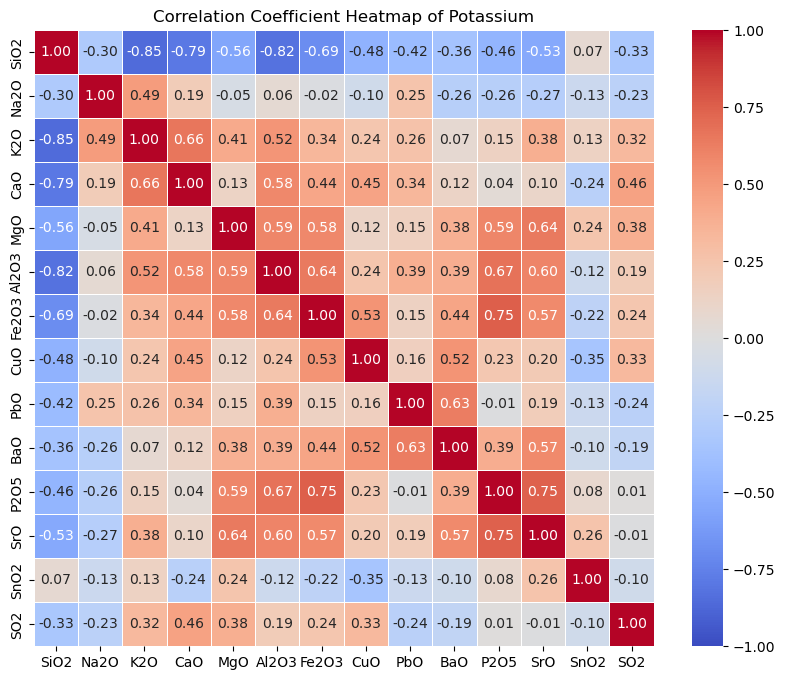

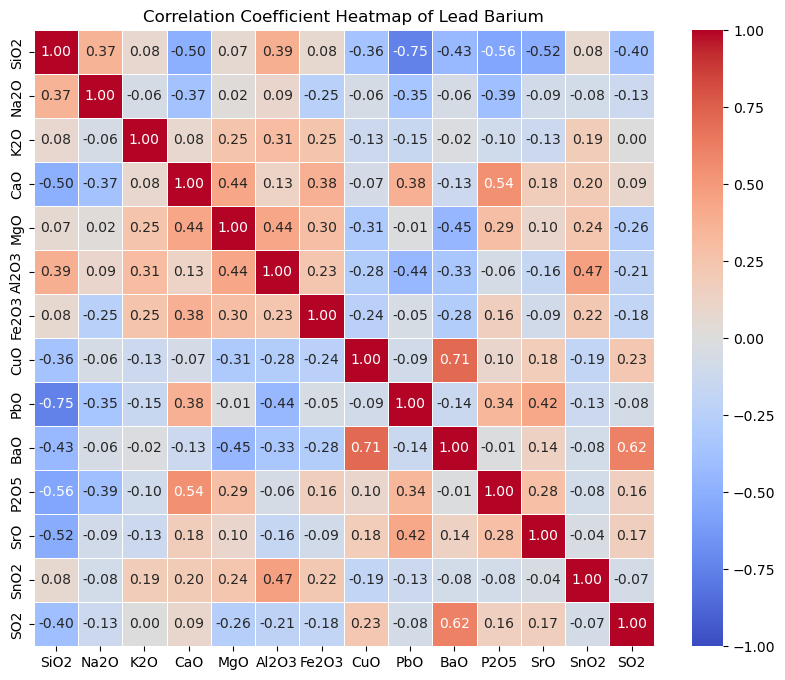

In [57]:
# heat map plot function
def heatmap_plot1(grouped_data,type):

    compounds_type = grouped_data.get_group(type)
    compounds_type = compounds_type.drop(compounds_type.columns[-1], axis=1)
    
    # Calculate the correlation matrix between the 14 columns of data
    correlation_matrix = compounds_type.corr()
    # Plot the heatmap
    plt.figure(figsize=(10, 8))  # Set the figure size
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Correlation Coefficient Heatmap of ' + type)
    plt.show()

compounds_bothtype = data_sheet2_cleaned.iloc[:,list(range(1, 15)) + [17]]

# simplify column name
def extract_inside_brackets(column_name):
    match = re.search(r'\((.*?)\)', column_name)
    if match:
        return match[1]
    else:
        return column_name

columns_list = compounds_bothtype.columns.tolist()
new_columns_list = [extract_inside_brackets(col) for col in columns_list]
compounds_bothtype.columns = new_columns_list

# Group compounds_bothtype by the "Glass type" column
grouped_data = compounds_bothtype.groupby("Glass type")

# Create two heatmaps for each glass type
heatmap_plot1(grouped_data,"Potassium")
heatmap_plot1(grouped_data,"Lead Barium")